### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster

# PC1 Apply the PCA to the superhero-data
Hint: For a sample analysis in Python see https://www.reneshbedre.com/blog/principal-component-anahtml Look at the iris example in the lower part

(a) Calculate the PCA and give out the principal components. Should one normalize before? Show
the coeffients of the first principal component

(b) Assess the number of needed dimensions

(c) Interpretation of the transformation: show the biplot with labeled variable names and describe,
what you see there: what do the first 2 PC’s mean?


## a)

In [2]:
# loading the superhero dataset after adding name of variables in csv
superhero_df = pd.read_csv('superheros.csv', delimiter=',')
superhero_df.head()

,Height,Intelligence,Strength,Speed,Agility,FightingSkills,Health
0,180.0,7.0,29,7.0,17,79.0,140.0
1,168.0,4.0,26,4.0,14,81.0,100.0
2,186.0,4.0,29,6.0,16,86.0,140.0
3,173.0,4.0,15,6.0,16,80.0,100.0
4,188.0,3.0,26,4.0,16,80.0,80.0


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster  # Ensure you have this package installed

class PCACreator:
    def __init__(self, dataframe: pd.DataFrame, n_dimensions: int = None, standardize: bool = True):
        """Initialize the PCA Creator with a DataFrame, number of dimensions for PCA, and standardization option."""
        self.dataframe = dataframe
        self.n_dimensions = n_dimensions
        self.standardize = standardize  # Option to standardize data
        self.pca = PCA(n_components=n_dimensions)
        self.pca_out = None
        self.loadings = None
        self.pca_scores = None

    def clean_data(self):
        """Interpolate missing values in the DataFrame."""
        self.dataframe = self.dataframe.interpolate()

    def standardize_data(self):
        """Standardize the data to have a mean of 0 and standard deviation of 1."""
        standardized_data = StandardScaler().fit_transform(self.dataframe)
        self.dataframe = pd.DataFrame(standardized_data, columns=self.dataframe.columns)

    def perform_pca(self):
        """Fit PCA on the (standardized or unstandardized) data and store the results."""
        self.clean_data()
        if self.standardize:
            self.standardize_data()
        self.pca_scores = self.pca.fit_transform(self.dataframe)
        self.pca_out = self.pca
        return self.pca_out

    def get_exp_variance(self):
        """Get the explained variance ratios of the principal components."""
        if self.pca_out is None:
            self.perform_pca()
        return self.pca_out.explained_variance_ratio_

    def get_loadings(self):
        """Get the loadings (principal component coefficients) for the PCA."""
        if self.pca_out is None:
            self.perform_pca()

        principal_components = self.pca_out.components_
        pc_list = ["PC" + str(i) for i in range(1, self.pca_out.n_components_ + 1)]
        loadings_df = pd.DataFrame(principal_components.T, columns=pc_list, index=self.dataframe.columns)
        self.loadings = loadings_df
        return loadings_df

    def get_cumulative_variance(self):
        """Get cumulative explained variance."""
        return np.cumsum(self.get_exp_variance())

    def plot_biplot(self, colorlist=None):
        """Create a biplot for the PCA results."""
        if self.pca_out is None:
            self.perform_pca()

        loadings = self.pca_out.components_
        pca_scores = self.pca_scores
        var1 = round(self.pca_out.explained_variance_ratio_[0] * 100, 2)
        var2 = round(self.pca_out.explained_variance_ratio_[1] * 100, 2)

        # Plot using bioinfokit
        cluster.biplot(
            cscore=pca_scores,
            loadings=loadings,
            labels=self.dataframe.columns.values,
            var1=var1,
            var2=var2,
            show=True,
            dim=(10, 8),
            colorlist=colorlist
        )

    def plot_corr_plot(self):
        """Plot a heatmap of the PCA loadings."""
        if self.loadings is None:
            self.get_loadings()
        sns.heatmap(self.loadings, annot=True, cmap='coolwarm', center=0)
        plt.title("PCA Loadings")
        plt.show()

    def assess_dimensions(self, variance_threshold=0.85):
        """Assess the number of dimensions needed to reach a given variance threshold."""
        explained_variance = self.get_exp_variance()
        cumulative_variance = self.get_cumulative_variance()
        num_needed_components = np.argmax(cumulative_variance >= variance_threshold) + 1
        return num_needed_components, cumulative_variance, explained_variance

    def plot_cumulative_variance_threshold(self, variance_threshold=0.85, title="Cumulative Explained Variance"):
        """Plot the cumulative explained variance against the number of components."""
        num_needed_components, cumulative_variance, explained_variance = self.assess_dimensions(variance_threshold)
        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Explained Variance per Component')
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
        plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold * 100}% Variance Threshold')
        plt.axvline(x=num_needed_components, color='g', linestyle='--', label=f'{num_needed_components} Components')
        plt.title(title)
        plt.xlabel("Number of Principal Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.legend()
        plt.grid()
        plt.show()


In [39]:
def get_coefficients_of_principal_components(pca_out):
    first_pc = pca_out['PC1']
    print("Coefficients of the first principal component:\n", first_pc)
    return first_pc

### Without standarization

In [41]:
PCACreator_NS = PCACreator(superhero_df, standardize=False)
PCACreator_NS.clean_data()

loadings = PCACreator_NS.get_loadings()
print(loadings)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
Height          0.074749  0.907928 -0.233549 -0.287494  0.180158 -0.008552   
Intelligence   -0.004680  0.002932  0.014983  0.054404  0.006775  0.277590   
Strength        0.083446  0.258225 -0.081885  0.953862  0.084400 -0.015892   
Speed           0.029139 -0.091624  0.132370 -0.015364  0.535371 -0.797015   
Agility         0.010441 -0.152591  0.042655 -0.027588  0.817513  0.529920   
FightingSkills -0.003154 -0.264209 -0.958587 -0.014965  0.058509 -0.078325   
Health          0.993207 -0.086559  0.017151 -0.057555 -0.044733  0.020850   

                     PC7  
Height          0.018750  
Intelligence    0.959001  
Strength       -0.049211  
Speed           0.226146  
Agility        -0.157749  
FightingSkills  0.038877  
Health          0.002389  


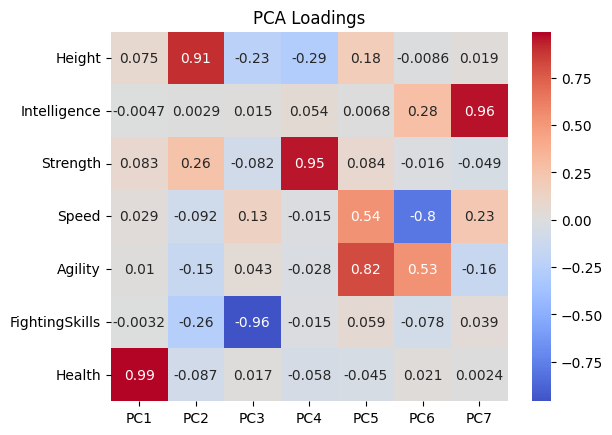

In [42]:
# plot the correlation matrix of the principal components
PCACreator_NS.plot_corr_plot()

In [43]:
# get the coefficients of the principal components
fist_pc = get_coefficients_of_principal_components(loadings)

Coefficients of the first principal component:
 Height            0.074749
Intelligence     -0.004680
Strength          0.083446
Speed             0.029139
Agility           0.010441
FightingSkills   -0.003154
Health            0.993207
Name: PC1, dtype: float64


### With Standarization

In [45]:
StandarizedPCACreator = PCACreator(superhero_df, standardize=True)
StandarizedPCACreator.clean_data()

standarized_loadings = StandarizedPCACreator.get_loadings()
print(standarized_loadings)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
Height          0.375045 -0.494865  0.033168 -0.004095  0.755319  0.153105   
Intelligence   -0.174042 -0.010369  0.645610  0.686322 -0.007412  0.284686   
Strength        0.509585 -0.258327  0.065036  0.291768 -0.364553 -0.587452   
Speed           0.431411  0.493408  0.075534 -0.165146 -0.091998  0.455350   
Agility         0.179551  0.665569  0.042021  0.214521  0.477769 -0.446023   
FightingSkills -0.099537  0.036239 -0.750740  0.598569  0.039366  0.185206   
Health          0.584048 -0.022819 -0.082313  0.110628 -0.241375  0.331408   

                     PC7  
Height         -0.139228  
Intelligence   -0.025504  
Strength       -0.325934  
Speed          -0.567139  
Agility         0.223144  
FightingSkills -0.176158  
Health          0.686484  


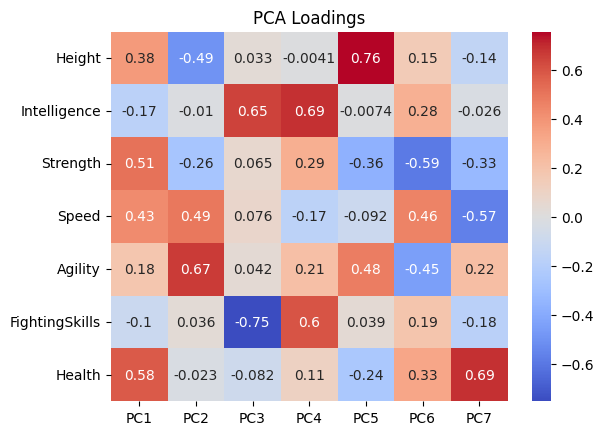

In [46]:
StandarizedPCACreator.plot_corr_plot()

In [47]:
# get the coefficients of the principal components
fist_pc_st = get_coefficients_of_principal_components(standarized_loadings)
print(fist_pc_st)

Coefficients of the first principal component:
 Height            0.375045
Intelligence     -0.174042
Strength          0.509585
Speed             0.431411
Agility           0.179551
FightingSkills   -0.099537
Health            0.584048
Name: PC1, dtype: float64
Height            0.375045
Intelligence     -0.174042
Strength          0.509585
Speed             0.431411
Agility           0.179551
FightingSkills   -0.099537
Health            0.584048
Name: PC1, dtype: float64


### Comparasion

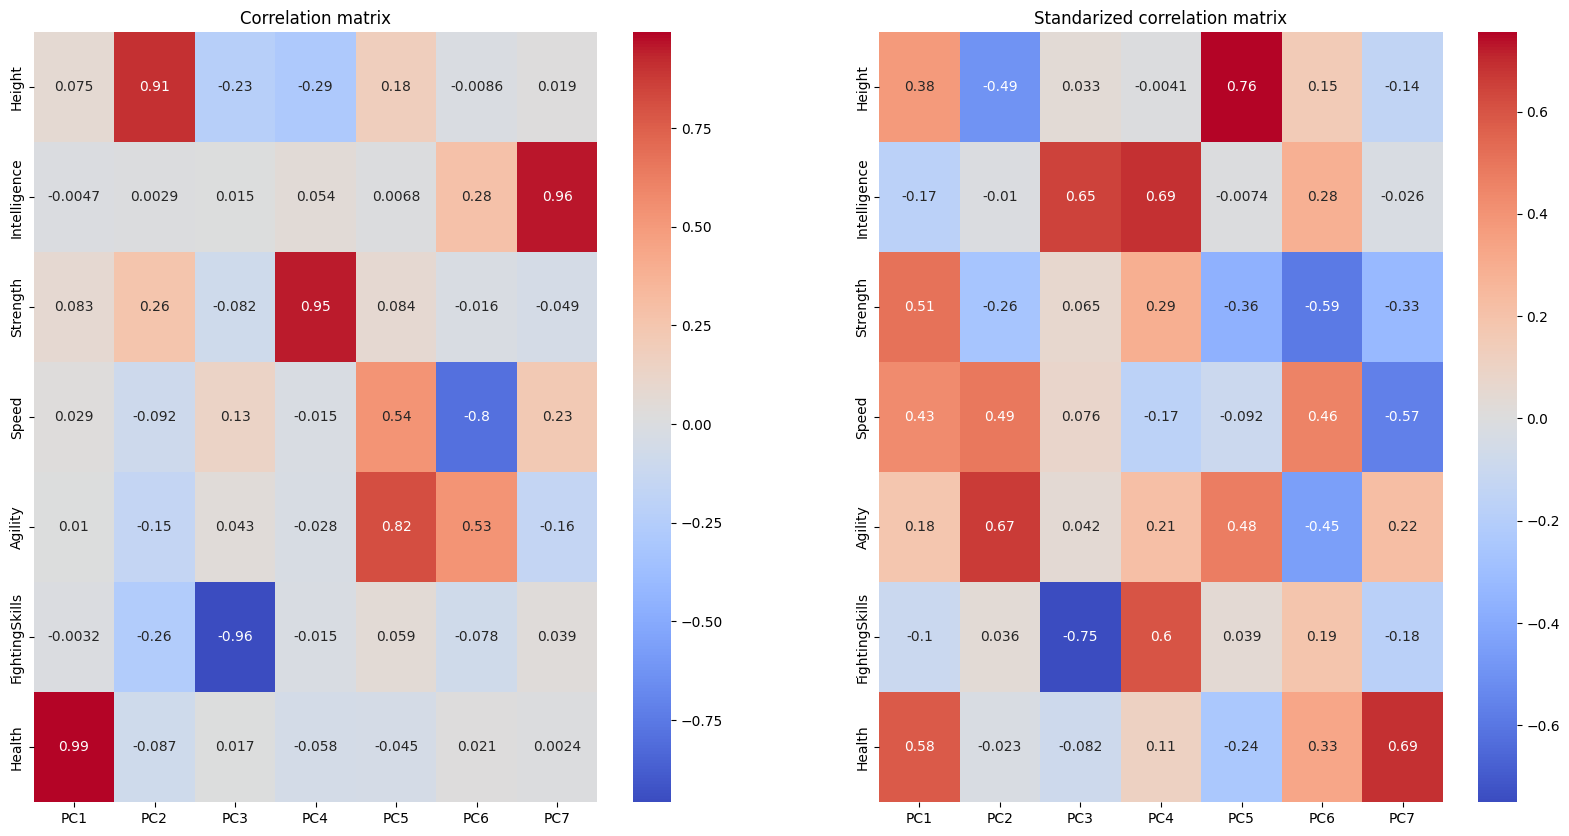

In [48]:
# Comparasion of the correlation matrixes
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix')
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.subplot(1, 2, 2)
plt.title('Standarized correlation matrix')
sns.heatmap(standarized_loadings, annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Comparasion of the coefficients of the first principal component')

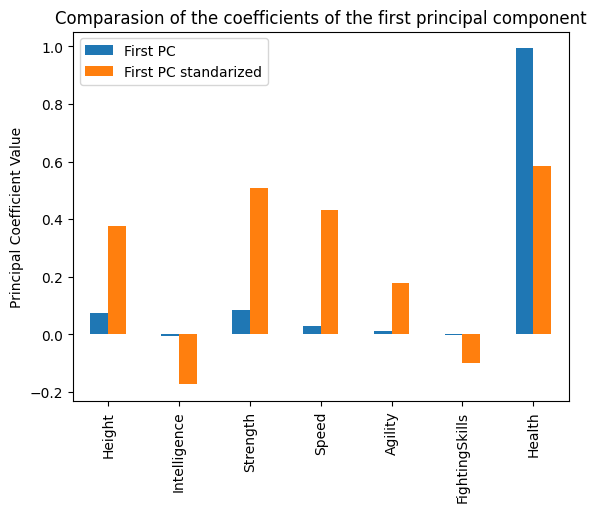

In [49]:
# Comparasion of the coefficients of the first principal component
first_pca = loadings['PC1']
first_pca_standarized = standarized_loadings['PC1']
pd.DataFrame({'First PC': first_pca, 'First PC standarized': first_pca_standarized}).plot(kind='bar')
plt.ylabel('Principal Coefficient Value')
plt.title('Comparasion of the coefficients of the first principal component')

## b)

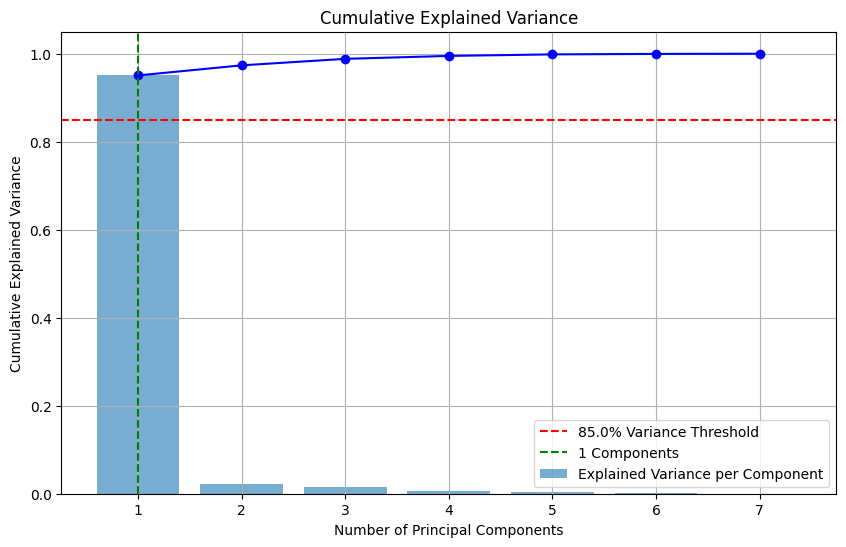

In [50]:
PCACreator_NS.plot_cumulative_variance_threshold()

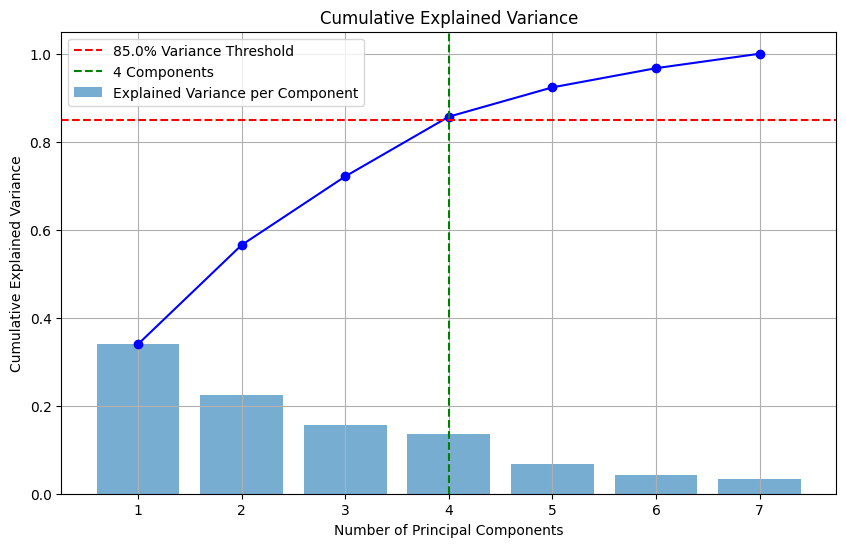

In [51]:
StandarizedPCACreator.plot_cumulative_variance_threshold()

## c)


#### Not Standarized

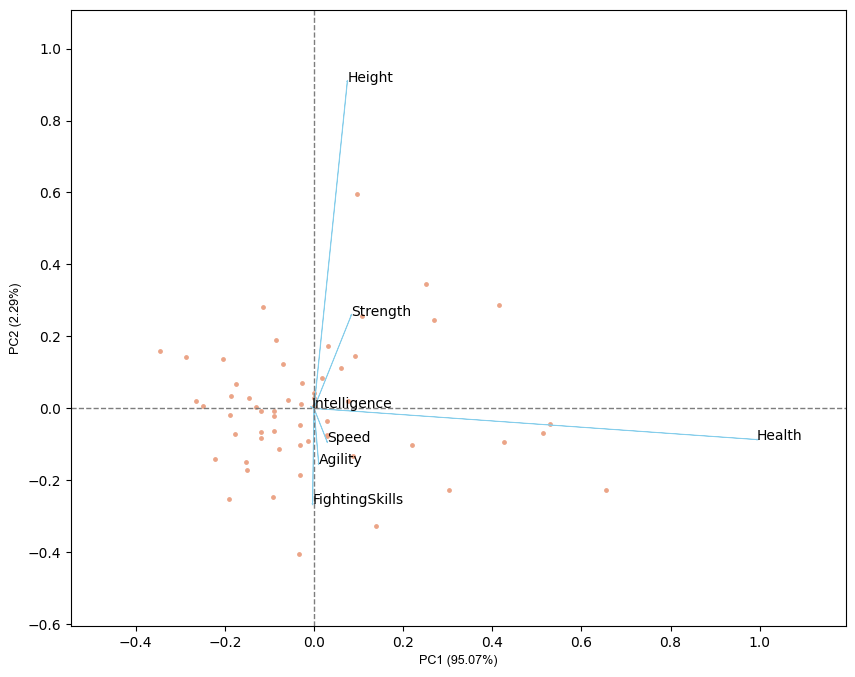

In [52]:
PCACreator_NS.plot_biplot()


#### Standarized

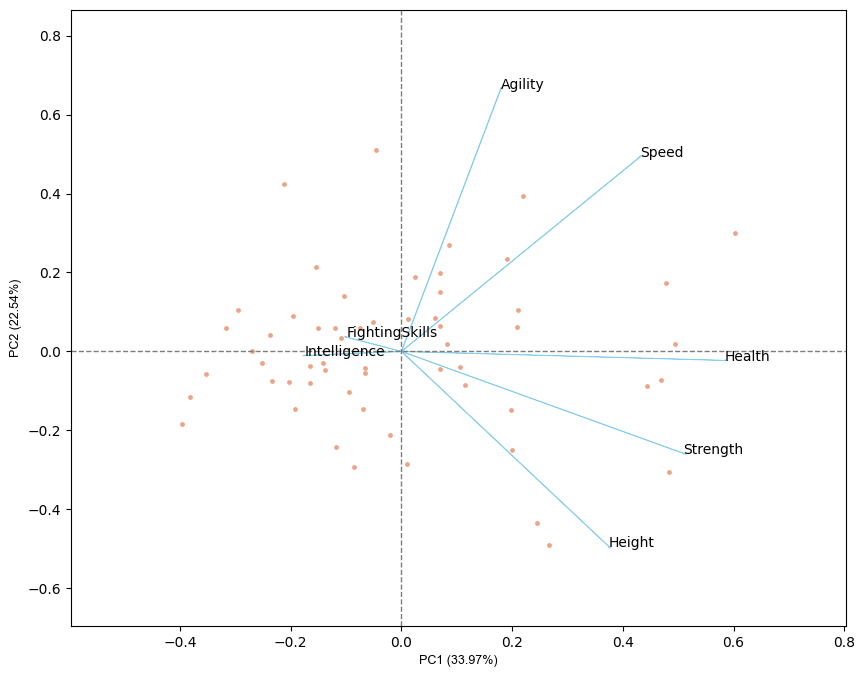

In [53]:
StandarizedPCACreator.plot_biplot()

Principal Component 1 (PC1):

- PC1 accounts for 36.3% of the variance in the dataset, which suggests it captures the most significant pattern or feature in the data.
- The vectors for Strength, Height, Health, and Speed point in a similar direction, which suggests these attributes are correlated and contribute significantly to PC1.
- In this context, PC1 might represent a general "Power/Physical Attribute" dimension. Characters with high values in these attributes (e.g., Strength and Health) would likely have a high score along PC1


Principal Component 2 (PC2):

- PC2 explains 22.9% of the variance, capturing an orthogonal (independent) pattern to PC1.
- The vectors for Agility and Speed are directed more toward PC2, indicating that these traits contribute more to this component.
- PC2 might represent an "Agility/Speed" dimension, highlighting attributes like agility and speed which are not necessarily linked to physical power.

# PC2 PCA for MNIST digit data

(a) Calculate the PCA. Should one normalize before?

(b) Assess the number of needed dimensions

(c) Visualize the transformed data. Can the different digits be separated?


## a)

In [ ]:
# loading the Mnist dataset
minst_df = pd.read_csv('MnistN1000.csv', delimiter=',', header=None)
minst_df.head()

# print the table of principal components without standarization
pca_table = print_table_of_principal_components(minst_df)
pca_table.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,PC784
variable,,,,,,,,,,,,,,,,,,,,,
0,1.999738e-19,-7.546528e-19,7.403989e-19,1.024655e-18,3.975787e-19,-3.568892e-18,-1.603256e-18,-1.262785e-18,-6.360888e-18,-2.219429e-18,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
1,-3.469447e-17,1.387779e-17,-2.775558e-17,2.775558e-17,-6.245005e-17,5.551115e-17,-1.387779e-17,-1.387779e-17,-0.000000e+00,-5.551115e-17,...,-0.043768,-0.063800,0.049780,-0.016976,0.032038,-0.008029,0.002663,-0.048264,-0.001151,-0.008641
2,2.775558e-17,-2.220446e-16,1.110223e-16,1.110223e-16,8.326673e-17,0.000000e+00,-2.775558e-17,-1.387779e-17,1.387779e-16,7.632783e-17,...,0.036191,0.063208,-0.003358,0.005774,-0.001596,-0.002693,0.040076,0.014855,-0.007679,0.002667
3,-1.110223e-16,0.000000e+00,0.000000e+00,4.163336e-17,-1.734723e-17,-6.938894e-17,-1.387779e-17,-4.163336e-17,-5.551115e-17,-1.387779e-17,...,0.011831,-0.021359,0.009465,0.001494,-0.051063,-0.009818,0.021479,0.034789,-0.001320,-0.000061
4,0.000000e+00,-4.163336e-17,5.551115e-17,2.775558e-17,5.551115e-17,-5.551115e-17,8.326673e-17,2.602085e-17,5.551115e-17,-4.857226e-17,...,-0.032100,-0.011285,0.005269,-0.011399,0.001492,-0.015727,0.023117,-0.012852,-0.000687,-0.000875


In [ ]:
# print the table of principal components with standarization
pca_table_standarized = print_table_of_principal_components(minst_df, if_standarize=True)
pca_table_standarized.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,PC784
variable,,,,,,,,,,,,,,,,,,,,,
0,-6.550027e-19,-1.120482e-18,5.614792e-19,3.741451e-19,-1.257514e-18,-3.228119e-18,-1.087969e-19,1.441376e-18,1.558563e-18,-5.003946e-19,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
1,-5.551115e-17,0.000000e+00,2.775558e-17,6.245005e-17,-5.551115e-17,0.000000e+00,5.204170e-17,0.000000e+00,-2.775558e-17,-7.285839e-17,...,-0.026031,-0.098627,-0.008335,-0.014398,-0.004181,0.017630,0.014249,-0.012011,0.030767,-0.013158
2,-0.000000e+00,1.110223e-16,-8.326673e-17,-1.387779e-17,-5.551115e-17,-5.551115e-17,-6.678685e-17,-4.163336e-17,-6.245005e-17,5.204170e-17,...,0.005123,-0.007680,0.028345,0.019904,0.005980,0.000953,0.028773,-0.012965,-0.002879,0.001411
3,1.110223e-16,-1.526557e-16,9.020562e-17,2.775558e-17,-5.551115e-17,-5.551115e-17,-6.591949e-17,-5.551115e-17,6.938894e-17,-2.775558e-17,...,0.008254,0.008172,0.057996,-0.015065,-0.009317,0.000989,-0.002266,0.002989,-0.000507,0.003656
4,5.551115e-17,-1.110223e-16,-2.775558e-17,-0.000000e+00,-5.551115e-17,2.775558e-17,-4.336809e-19,-5.724587e-17,-4.857226e-17,-2.428613e-17,...,-0.005153,-0.010846,0.052031,0.030704,-0.003699,-0.010967,0.010242,-0.011986,-0.015405,0.007719


## b)

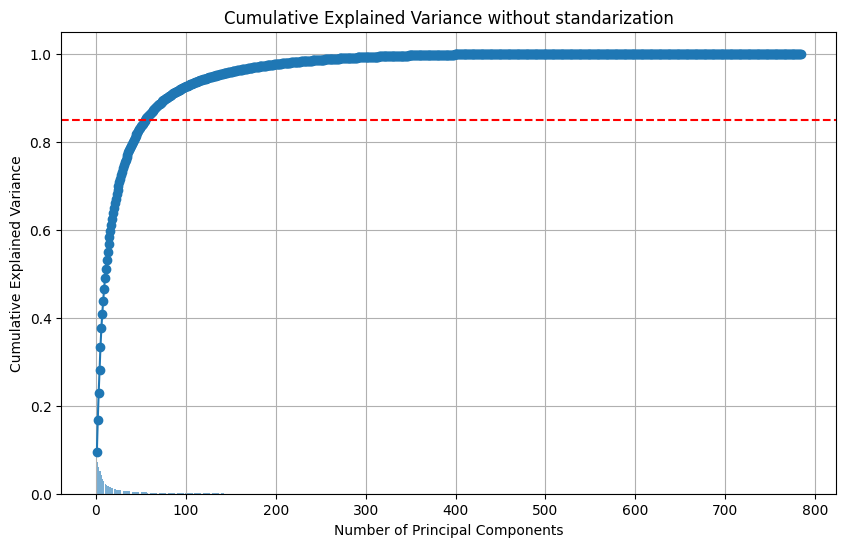

Number of components needed to reach 85% variance without standarization: 55


In [ ]:
# without standarization
minset_without_standarization = get_pca_out(minst_df)
num_needed_components, cumulative_variance, explained_variance = assess_dimensions(minset_without_standarization)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance without standarization", explained_variance)
print(f"Number of components needed to reach 85% variance without standarization: {num_needed_components}")

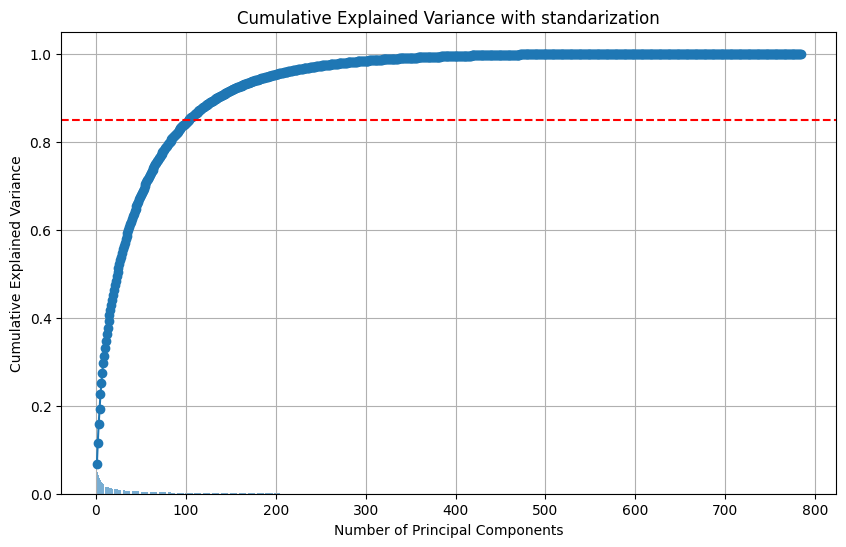

Number of components needed to reach 85% variance: 104


In [ ]:
# with standarization
minset_with_standarization = get_pca_out(minst_df, if_standarize=True)
num_needed_components, cumulative_variance, explained_variance = assess_dimensions(minset_with_standarization)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance with standarization", explained_variance)
print(f"Number of components needed to reach 85% variance: {num_needed_components}")

## c)

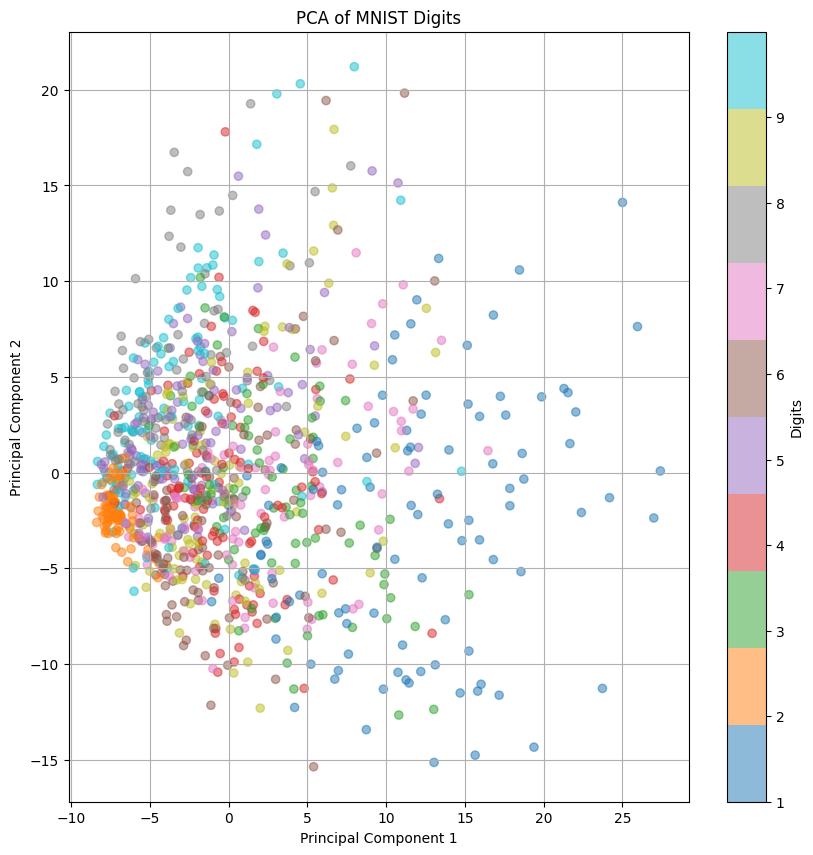

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(minst_df)
y=pd.read_csv('MnistLabels.csv', delimiter=',', header=None)

# Reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.title('PCA of MNIST Digits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(10), label='Digits')
plt.grid()
plt.show()

# PC3 Movie data

(a) Load and very briefly describe the movie data (data understanding), i.e. what rows and columns do we have, what entries are there?

(b) Apply a PCA to the movie data. How many dimensions should we keep in order to not loose too much information?

(c) Show the biplot with labeled variable names and describe, what you see there. How useful is this plot? Why or why not (depending on your answer before)?

## a)

In [ ]:
movieData_df = pd.read_csv('movieData.csv', delimiter=',')
movieData_df.head()

,Row,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,"""#7DaysLater"" (2013)",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
columns = movieData_df.columns.to_list()[1::]
entires = {}
for column in columns:
    amount = movieData_df[column].sum()
    entires[column] = int(amount)

entries_pd = pd.DataFrame.from_dict(entires, orient='index', columns=['Amount'])
entries_pd.head(28)

,Amount
Action,5215
Adult,10
Adventure,4306
Animation,5155
Biography,795
Comedy,13131
Crime,6605
Documentary,6363
Drama,20215
Family,6645


1. Column **"Row"**: This column contains the name of the movie.
2. **Another 28 columns**: These columns represent the main genres of the movie. They are encoded using one-hot encoding, where 1 indicates that the movie belongs to this genre, and 0 indicates that it does not.

## b)

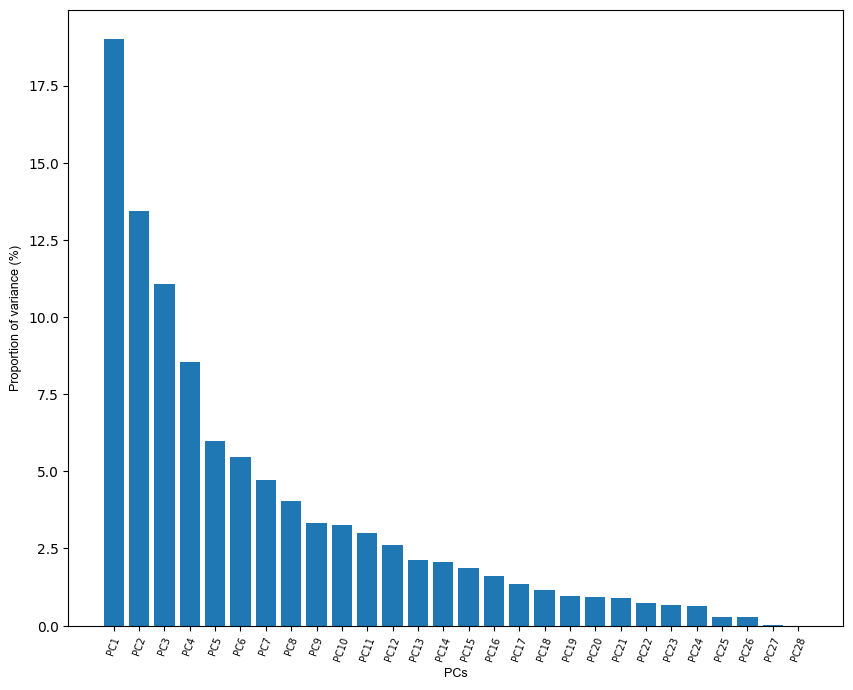

In [ ]:
# Copy and clean the data
movieData_df_copy = movieData_df.copy()
movieData_df_copy.fillna("ffill", inplace=True)
filtered_df = movieData_df.loc[:, movieData_df.notna().sum() > 1]
filtered_df = filtered_df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)

# Perform PCA on the cleaned data
pca_out_movies = PCA().fit(filtered_df)

# Extract loadings and the number of components
loadings_movies = pca_out_movies.components_
num_pc_movies = pca_out_movies.n_components_

# Create a DataFrame for loadings
pc_list_movies = ["PC" + str(i) for i in range(1, num_pc_movies + 1)]
loadings_df_movies = pd.DataFrame(loadings_movies.T, columns=pc_list_movies, index=filtered_df.columns)

# Call cluster.screeplot, ensuring the format is compatible
cluster.screeplot(obj=[pc_list_movies, pca_out_movies.explained_variance_ratio_], show=True, dim=(10, 8))

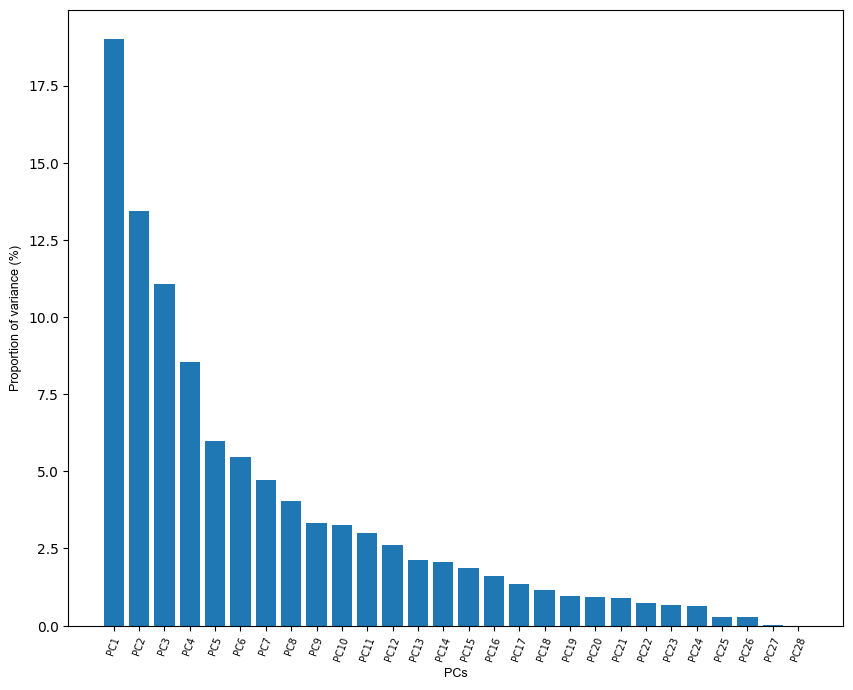

In [ ]:
# Copy and clean the data
movieData_df_copy = movieData_df.copy()
movieData_df_copy.fillna("ffill", inplace=True)
filtered_df = movieData_df.loc[:, movieData_df.notna().sum() > 1]
filtered_df = filtered_df.select_dtypes(include=[np.number])


# Perform PCA on the cleaned data
pca_out_movies = PCA().fit(filtered_df)

# Extract loadings and the number of components
loadings_movies = pca_out_movies.components_
num_pc_movies = pca_out_movies.n_components_

# Create a DataFrame for loadings
pc_list_movies = ["PC" + str(i) for i in range(1, num_pc_movies + 1)]
loadings_df_movies = pd.DataFrame(loadings_movies.T, columns=pc_list_movies, index=filtered_df.columns)

# Call cluster.screeplot, ensuring the format is compatible
cluster.screeplot(obj=[pc_list_movies, pca_out_movies.explained_variance_ratio_], show=True, dim=(10, 8))

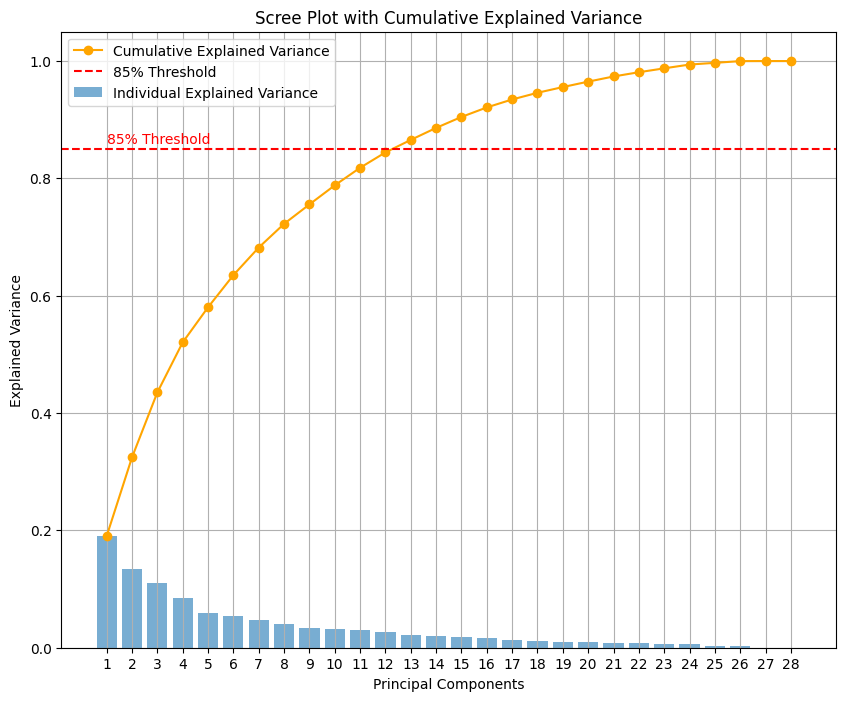

In [ ]:
# without standatization
movieData_df_copy = movieData_df.copy()
movieData_df_copy.fillna("ffill", inplace=True)
filtered_df = movieData_df_copy.loc[:, movieData_df_copy.notna().sum() > 1]
filtered_df = filtered_df.select_dtypes(include=[np.number])

# Perform PCA on the cleaned data
pca_out_movies = PCA().fit(filtered_df)

# Extract explained variance and the number of components
explained_variance = pca_out_movies.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_pc_movies = pca_out_movies.n_components_

# Create a scree plot
plt.figure(figsize=(10, 8))

# Plot explained variance
plt.bar(range(1, num_pc_movies + 1), explained_variance, alpha=0.6, label='Individual Explained Variance')

# Plot cumulative explained variance
plt.plot(range(1, num_pc_movies + 1), cumulative_variance, marker='o', color='orange', label='Cumulative Explained Variance')

# Add horizontal line at threshold 0.85
plt.axhline(y=0.85, color='red', linestyle='--', label='85% Threshold')

# Annotate the threshold line
plt.text(1, 0.86, '85% Threshold', color='red', fontsize=10)

# Labels and title
plt.title('Scree Plot with Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, num_pc_movies + 1))
plt.grid()
plt.legend()
plt.show()



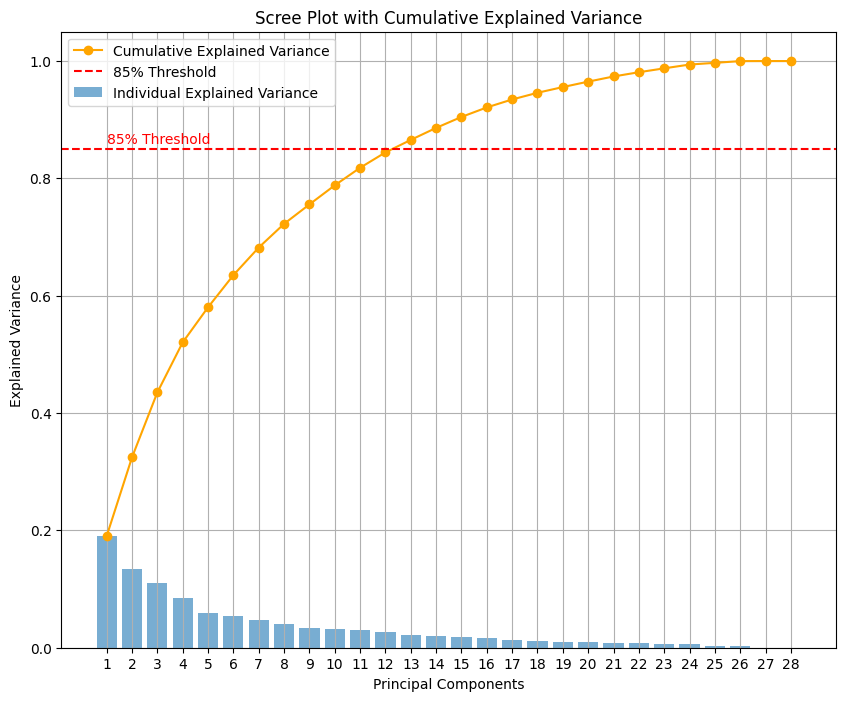

In [ ]:
# with standatization
movieData_df_copy = movieData_df.copy()
movieData_df_copy.drop(columns=['Row'], inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(movieData_df_copy)
movieData_df_copy.dropna(inplace=True)
filtered_df = movieData_df_copy.loc[:, movieData_df_copy.notna().sum() > 1]
filtered_df = filtered_df.select_dtypes(include=[np.number])


# Perform PCA on the cleaned data
pca_out_movies = PCA().fit(filtered_df)

# Extract explained variance and the number of components
explained_variance = pca_out_movies.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_pc_movies = pca_out_movies.n_components_

# Create a scree plot
plt.figure(figsize=(10, 8))

# Plot explained variance
plt.bar(range(1, num_pc_movies + 1), explained_variance, alpha=0.6, label='Individual Explained Variance')

# Plot cumulative explained variance
plt.plot(range(1, num_pc_movies + 1), cumulative_variance, marker='o', color='orange', label='Cumulative Explained Variance')

# Add horizontal line at threshold 0.85
plt.axhline(y=0.85, color='red', linestyle='--', label='85% Threshold')

# Annotate the threshold line
plt.text(1, 0.86, '85% Threshold', color='red', fontsize=10)

# Labels and title
plt.title('Scree Plot with Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, num_pc_movies + 1))
plt.grid()
plt.legend()
plt.show()



## c)

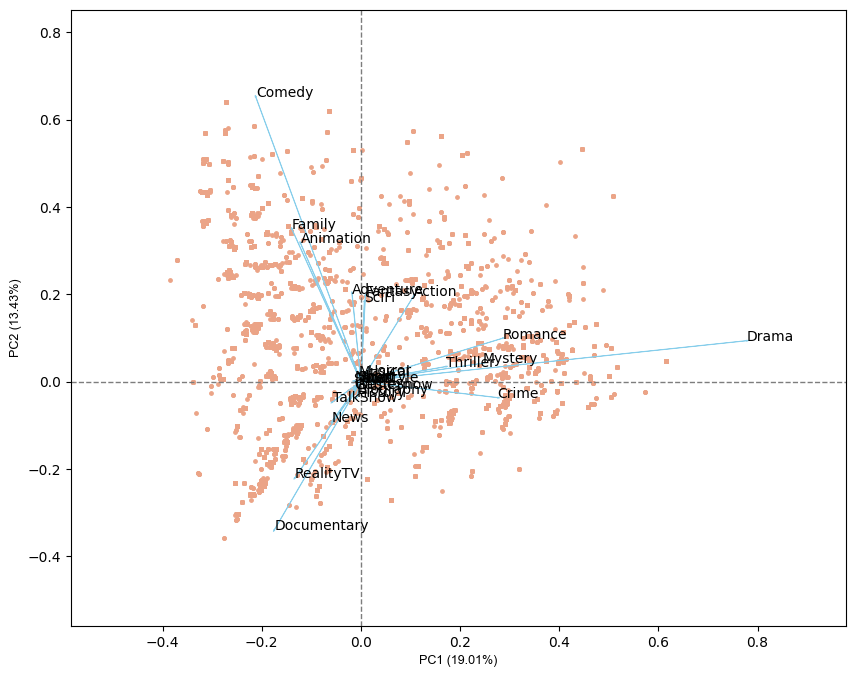

In [ ]:
df_st = movieData_df.copy()
df_st.drop(columns=['Row'], inplace=True)

pca_out = PCA().fit(df_st)

pca_scores = PCA().fit_transform(df_st)

loadings = pca_out.components_
num_pc = pca_out.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_st.columns.values
loadings_df = loadings_df.set_index('variable')

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df_st.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), show=True, dim=(10, 8))


Axes:

The x-axis represents Principal Component 1 (PC1), which explains 19.01% of the variance in the dataset.
The y-axis represents Principal Component 2 (PC2), which explains 13.43% of the variance.
Together, these two components account for about 32.44% of the total variance in the data, indicating that while some structure is captured, a significant portion of variance remains unexplained.

Data Points:

Each point in the biplot corresponds to an observation (in this case, movies or shows).
The distribution of points provides insight into the clustering of different observations. Points that are closer together have similar characteristics based on the original features used for PCA.

Direction and Length of Vectors (Loadings):

The vectors represent the original features (genres in this case) projected onto the PCA space.
The length of the vector indicates how much that feature contributes to the respective principal components; longer vectors represent features that explain more variance in that direction.
The direction of the vectors shows the correlation with the principal components:
Features pointing in the same direction are positively correlated.
Features pointing in opposite directions are negatively correlated.
Features at right angles (90 degrees) to each other are uncorrelated.

Genre Relationships:

For example, you might observe that Action, Adventure, and Sci-Fi have vectors that point similarly towards the right side of the plot, suggesting that these genres share characteristics and tend to co-occur.
Conversely, if two genres (like Documentary and Action) point in opposite directions, it suggests that these genres have contrasting characteristics.

Cluster Analysis:

The clustering of points could suggest certain groupings of movies. For instance, if there is a dense cluster of points in one area, it may indicate a popular genre or theme among the observed data.
Genres that are close to each other might suggest they attract a similar audience or have similar thematic elements.

Outliers:

Any points that are far from the cluster of points could be considered outliers. These might represent movies that have unique characteristics compared to the rest of the dataset.

Summary

This biplot effectively visualizes the relationships between movie genres and how they relate to the principal components derived from the PCA. It allows for a quick assessment of which genres are similar, which are distinct, and how the observed movies are positioned in relation to these genres based on their features.